In [ ]:
# Minfei Wang / 001409959
# Weijie Li / 001400675 
# Zelin Han / 400380479

In [1]:
# 1.
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D

In [2]:
# 2.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

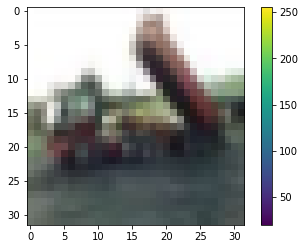

In [3]:
# 3.
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
# 4.
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.0

In [5]:
# 5.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

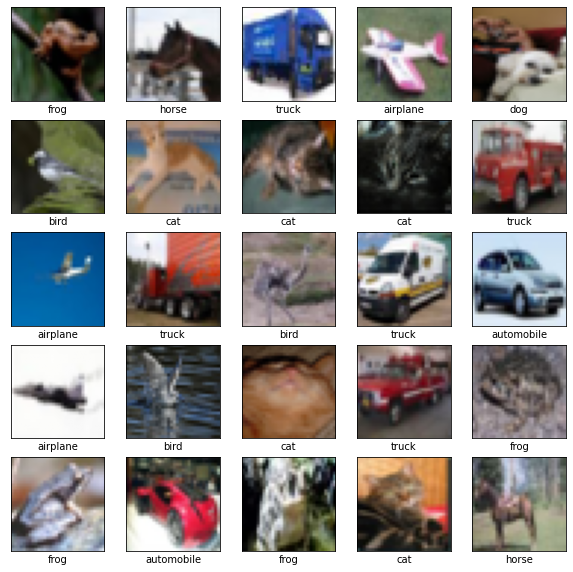

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [7]:
# 6.
model = keras.Sequential([
    # Conv2D & MaxPooling2D :
    # https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
    keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])



2021-11-21 14:42:01.873796: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# 7.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


In [9]:
# 8.
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 49s 34ms/step - loss: 1.4492 - accuracy: 0.4688 - val_loss: 1.1259 - val_accuracy: 0.6030
Epoch 2/20
1407/1407 [==============================] - 47s 34ms/step - loss: 1.0103 - accuracy: 0.6409 - val_loss: 0.9653 - val_accuracy: 0.6646
Epoch 3/20
1407/1407 [==============================] - 47s 33ms/step - loss: 0.8365 - accuracy: 0.7033 - val_loss: 0.8259 - val_accuracy: 0.7086
Epoch 4/20
1407/1407 [==============================] - 49s 35ms/step - loss: 0.7131 - accuracy: 0.7506 - val_loss: 0.8194 - val_accuracy: 0.7186
Epoch 5/20
1407/1407 [==============================] - 47s 34ms/step - loss: 0.6204 - accuracy: 0.7812 - val_loss: 0.8026 - val_accuracy: 0.7236
Epoch 6/20
1407/1407 [==============================] - 47s 33ms/step - loss: 0.5320 - accuracy: 0.8122 - val_loss: 0.8435 - val_accuracy: 0.7240
Epoch 7/20
1407/1407 [==============================] - 47s 33ms/step - loss: 0.4587 - accuracy: 0.8393 - val_loss: 0.8047 -

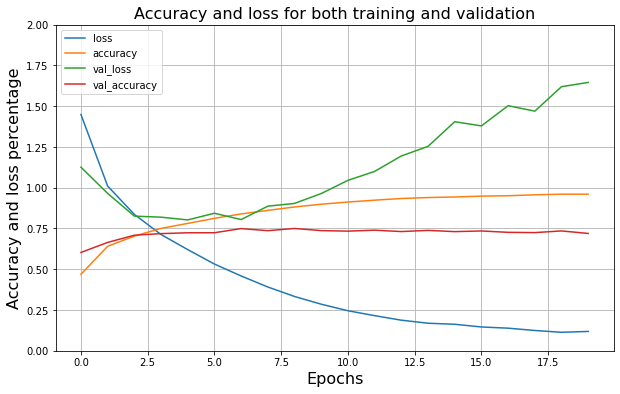

In [10]:
# 9.
history_dict = history.history
history_dict.keys()

pd.DataFrame(history_dict).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title('Accuracy and loss for both training and validation', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy and loss percentage', rotation=90, fontsize=16)
plt.show() 

In [15]:
# 10.
results = model.evaluate(X_test,  y_test)
print('test acuracy:',results[1])

313/313 [==============================] - 3s 10ms/step - loss: 1.7109 - accuracy: 0.7100
test acuracy: 0.7099999785423279


In [16]:
# 11.
# The Conv2D & MaxPooling2D code are already added to #6